In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.dates as mdates
import json
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', -1)

In [118]:
import pickle
df = pd.read_pickle("projectData/experienceTimeMatrix.p")
df = pd.DataFrame(df, columns=['author', 'timeStamp', 'commit'])
df=df.sort_index(axis=0 ,ascending=False)
df= df.reset_index(drop=True)

In [119]:
df.timeStamp = pd.to_datetime(df.timeStamp, unit='s')

In [120]:
topAuthors = df.groupby('author').count().nlargest(50,'commit').index

contributionMatrix=[]
for author in topAuthors:
    print(author)
    subMatrix = df[df.author==author]
    contributionPerMonth = subMatrix.timeStamp.groupby(subMatrix.timeStamp.dt.to_period('M')).count()
    contributionMatrix.append(contributionPerMonth)
    
minDate=pd.to_datetime('2020-01-01')
for matrix in contributionMatrix:    
    #convert both to timeStamps
    minTimeStamp =  pd.to_datetime(str(minDate))
    timeStamp = pd.to_datetime(str(matrix.index[0]))
    #if greater then udpate min-date
    if timeStamp < minTimeStamp:
        minDate= matrix.index[0]
        
print(minDate)
        


Vinod Kumar Vavilapalli
Tsz-wo Sze
Alejandro Abdelnur
Eli Collins
Arun Murthy
Suresh Srinivas
Todd Lipcon
Haohui Mai
Robert Joseph Evans
Aaron Myers
Andrew Wang
Chris Nauroth
Jing Zhao
Karthik Kambatla
Jian He
Thomas White
Arpit Agarwal
Colin Patrick Mccabe
Jason Darrell Lowe
cnauroth
Kihwal Lee
Mahadev Konar
Sanford Ryza
Thomas Graves
Zhijie Shen
Tsuyoshi Ozawa
Colin McCabe
Brandon Li
Jason Lowe
Steve Loughran
Siddharth Seth
Akira Ajisaka
Vinayakumar B
Harsh J
Allen Wittenauer
Uma Maheswara Rao G
Jonathan Turner Eagles
Junping Du
Xuan
Konstantin Boudnik
Konstantin Shvachko
Daryn Sharp
Wangda Tan
Bikas Saha
Owen O'Malley
Christopher Douglas
Tsz-Wo Nicholas Sze
Devaraj Das
arp
Devaraj K
2009-05


In [121]:
def month_diff(a, b):
    return 12 * (a.year - b.year) + (a.month - b.month)

Vinod Kumar Vavilapalli
[480 492 504 516 528] <a list of 5 Text xticklabel objects>
Tsz-wo Sze


/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[480 492 504 516 528] <a list of 5 Text xticklabel objects>


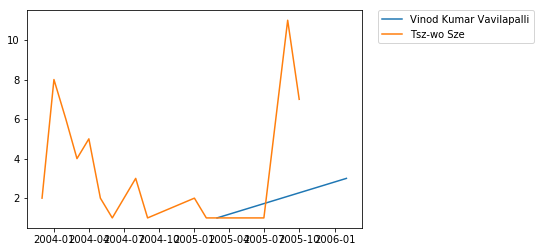

In [122]:
currentAuthors = topAuthors[:2]
fig, ax = pt.subplots()
for author in currentAuthors:
    print(author)
    subMatrix = df[df.author==author]
    minTimeStamp =  pd.to_datetime(str(minDate))
#     timeStamp = subMatrix.timeStamp.iloc[0]
#     print(subMatrix.timeStamp)
    diffMonths = month_diff(timeStamp, minTimeStamp)
    offsetTimeStamp = subMatrix.timeStamp+pd.DateOffset(months=-diffMonths)
    subMatrix.timeStamp= offsetTimeStamp
    contributionPerMonth = subMatrix.timeStamp.groupby(subMatrix.timeStamp.dt.to_period('M')).count()
    contributionPerMonth=contributionPerMonth[:-40]
#     print(subMatrix.timeStamp)
#     print(contributionPerMonth)
    dates = contributionPerMonth.index.to_timestamp()
#     contributionPerMonth.plot(ax=ax)
    ax.plot(dates, contributionPerMonth.values)
#     ax.xaxis.set_major_locator(mdates.MonthLocator())
#     loc, labels = pt.xticks()
#     fig.autofmt_xdate()
    print(loc, labels)
    
pt.legend(currentAuthors, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pt.savefig("original.png", bbox_inches="tight")


Vinod Kumar Vavilapalli
[480 492 504 516 528] <a list of 5 Text xticklabel objects>
Tsz-wo Sze
[480 492 504 516 528] <a list of 5 Text xticklabel objects>


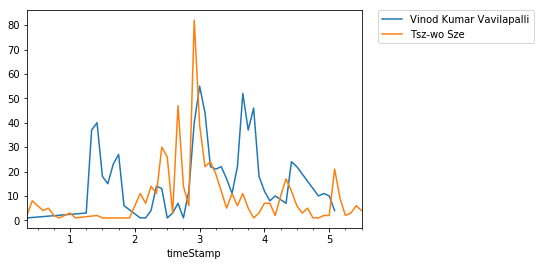

In [123]:
currentAuthors = topAuthors[:2]
fig, ax = pt.subplots()
for author in currentAuthors:
    print(author)
    subMatrix = df[df.author==author]
    minTimeStamp =  pd.to_datetime(str(minDate))
    timeStamp = subMatrix.timeStamp.iloc[0]
#     print(subMatrix.timeStamp)
    diffMonths = month_diff(timeStamp, minTimeStamp)
    offsetTimeStamp = subMatrix.timeStamp+pd.DateOffset(months=-diffMonths)
    subMatrix.timeStamp= offsetTimeStamp
    contributionPerMonth = subMatrix.timeStamp.groupby(subMatrix.timeStamp.dt.to_period('M')).count()
#     print(subMatrix.timeStamp)
#     print(contributionPerMonth)
    contributionPerMonth.plot(ax=ax)
    ax.legend(currentAuthors, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    loc, labels = pt.xticks()
    pt.xticks(loc, np.arange(1, 6, step=1))
    print(loc, labels)
    
pt.savefig('productivity.png', bbox_inches="tight")

Vinod Kumar Vavilapalli
Tsz-wo Sze
Alejandro Abdelnur
Eli Collins
Arun Murthy
Suresh Srinivas
Todd Lipcon
Haohui Mai
Robert Joseph Evans
Aaron Myers
Andrew Wang
Chris Nauroth
Jing Zhao
Karthik Kambatla
Jian He
Thomas White
Arpit Agarwal
Colin Patrick Mccabe
Jason Darrell Lowe
cnauroth


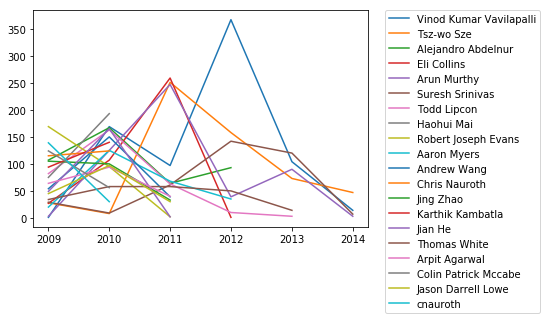

In [124]:
currentAuthors = topAuthors[:20]
fig, ax = pt.subplots()
universalYears=[]
contributionYearMatrix = []
for author in currentAuthors:
    print(author)
    subMatrix = df[df.author==author]
    minTimeStamp =  pd.to_datetime(str(minDate))
    timeStamp = subMatrix.timeStamp.iloc[0]
#     print(subMatrix.timeStamp)
    diffMonths = month_diff(timeStamp, minTimeStamp)
    offsetTimeStamp = subMatrix.timeStamp+pd.DateOffset(months=-diffMonths)
    subMatrix.timeStamp= offsetTimeStamp
    contributionPerMonthGroups = subMatrix.timeStamp.groupby(subMatrix.timeStamp.dt.to_period('Y')).count()
    contributionYearMatrix.append(contributionPerMonthGroups.values)
    dates = contributionPerMonthGroups.index.to_timestamp()
    universalYears.append(dates)
    pt.plot(dates, contributionPerMonthGroups.values)
    ax.legend(currentAuthors, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



    

       0      1      2      3      4      5      6      7      8      9  ...  \
0  1.0    28.0   107.0  27.0   3.0    29.0   82.0   75.0   169.0  20.0   ...   
1  169.0  8.0    167.0  107.0  247.0  9.0    163.0  193.0  95.0   125.0  ...   
2  97.0   251.0  64.0   259.0  39.0   61.0   63.0   0.0    2.0    68.0   ...   
3  367.0  158.0  93.0   1.0    90.0   142.0  10.0   0.0    0.0    35.0   ...   
4  104.0  73.0   0.0    0.0    3.0    120.0  3.0    0.0    0.0    0.0    ...   
5  14.0   47.0   0.0    0.0    0.0    7.0    0.0    0.0    0.0    0.0    ...   

      14    15    16     17    18     19    mean   1st    3rd  median  
0  49.0   34.0  64.0  124.0  45.0  139.0  68.20   29.0  106.6  64.00   
1  165.0  58.0  94.0  56.0   97.0  30.0   114.85  94.0  164.6  114.85  
2  2.0    58.0  40.0  0.0    30.0  0.0    55.30   2.0   63.8   39.00   
3  0.0    50.0  0.0   0.0    0.0   0.0    47.30   0.0   82.0   0.00    
4  0.0    14.0  0.0   0.0    0.0   0.0    15.85   0.0   11.8   0.00    
5  0.0 

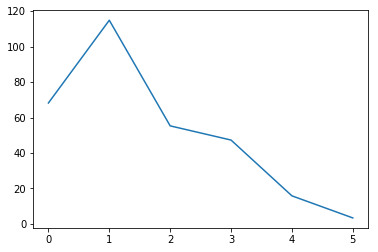

6 6


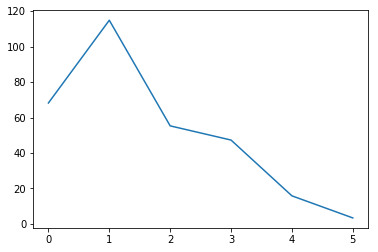

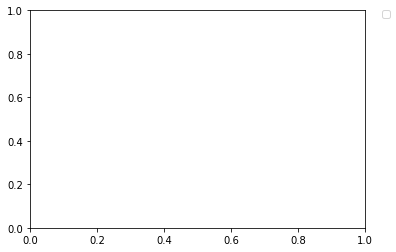

In [125]:
cy = pd.DataFrame(contributionYearMatrix)
cy=cy.fillna(0)
cy = cy.T
# cy.columns= ["author1", "author2", "author3"]
cy['mean']=cy.mean(axis=1)
cy['1st']=cy.quantile(0.25, axis=1)
cy['3rd']=cy.quantile(0.80,axis=1)
cy['median']=cy.median(axis=1)
print(cy)

pt.plot(range(len(universalYears[0])), cy['mean'])
# pt.plot(universalYears[0], cy['1st'])
# pt.plot(universalYears[0], cy['3rd'])
# pt.plot(universalYears[0], cy['median'])

pt.show()
lowess = sm.nonparametric.lowess
Z = lowess(cy['mean'], range(len(universalYears[0])), frac=0.5, it=2)

lowess_x = list(zip(*Z))[0]
lowess_y = list(zip(*Z))[1]

print(len(lowess_x), len(lowess_y))

# plt.plot(X[idx],cb_lower[maxSoFar],'k--',linewidth=3)
# plt.plot(X[idx],cb_upper[maxSoFar],'k--',linewidth=3);
# pt.plot(lowess_x,lowess_y)

pt.plot(lowess_x, lowess_y)
pt.show()

# print(universalYears[0])

pt.legend(['mean', 'another'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Vinod Kumar Vavilapalli
Tsz-wo Sze
Alejandro Abdelnur
Eli Collins
Arun Murthy
Suresh Srinivas
Todd Lipcon
Haohui Mai
Robert Joseph Evans
Aaron Myers
Andrew Wang
Chris Nauroth
Jing Zhao
Karthik Kambatla
Jian He
Thomas White
Arpit Agarwal
Colin Patrick Mccabe
Jason Darrell Lowe
cnauroth
Kihwal Lee
Mahadev Konar
Sanford Ryza
Thomas Graves
Zhijie Shen
Tsuyoshi Ozawa
Colin McCabe
Brandon Li
Jason Lowe
Steve Loughran
Siddharth Seth
Akira Ajisaka
Vinayakumar B
Harsh J
Allen Wittenauer
Uma Maheswara Rao G
Jonathan Turner Eagles
Junping Du
Xuan
Konstantin Boudnik
Konstantin Shvachko
Daryn Sharp
Wangda Tan
Bikas Saha
Owen O'Malley
Christopher Douglas
Tsz-Wo Nicholas Sze
Devaraj Das
arp
Devaraj K


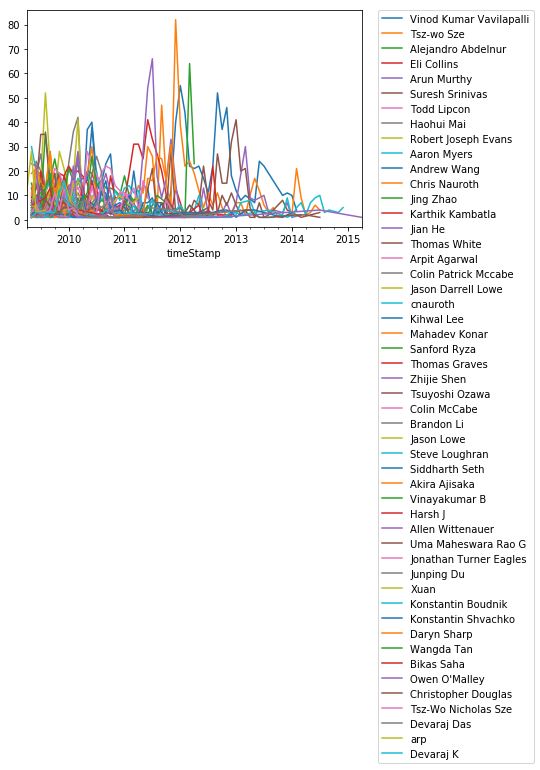

In [126]:
currentAuthors = topAuthors[:50]
fig, ax = pt.subplots()
contributionMonthMatrix = []
universalDates=[]
for author in currentAuthors:
    print(author)
    subMatrix = df[df.author==author]
    minTimeStamp =  pd.to_datetime(str(minDate))
    timeStamp = subMatrix.timeStamp.iloc[0]
#   print(subMatrix.timeStamp)
    diffMonths = month_diff(timeStamp, minTimeStamp)
    offsetTimeStamp = subMatrix.timeStamp+pd.DateOffset(months=-diffMonths)
    subMatrix.timeStamp= offsetTimeStamp
    contributionPerMonthGroups = subMatrix.timeStamp.groupby(subMatrix.timeStamp.dt.to_period('M')).count()
    dates = contributionPerMonthGroups.index.to_timestamp()
    contributionMonthMatrix.append(contributionPerMonthGroups.values)
    universalDates.append(dates)
#   print(subMatrix.timeStamp)
#   print(contributionPerMonth)
    contributionPerMonthGroups.plot(ax=ax)
    ax.legend(currentAuthors, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

In [127]:
maxSoFar=[]
minSoFar=[8]*500
for i, dateList in enumerate(universalDates):
    if len(dateList)> len(maxSoFar):
        maxSoFar=dateList
    if len(dateList)< len(minSoFar):
        minSoFar=dateList
        
print(len(maxSoFar), len(minSoFar))

54 4


       0     1     2     3     4     5     6     7     8     9  ...    44  \
0   1.0   2.0   15.0  3.0   2.0   13.0  1.0   1.0   3.0   7.0   ...  6.0    
1   3.0   8.0   6.0   2.0   1.0   4.0   14.0  24.0  16.0  6.0   ...  10.0   
2   37.0  6.0   18.0  2.0   1.0   2.0   8.0   20.0  17.0  3.0   ...  1.0    
3   40.0  4.0   14.0  3.0   6.0   1.0   8.0   5.0   52.0  3.0   ...  9.0    
4   18.0  5.0   16.0  2.0   28.0  1.0   2.0   12.0  22.0  1.0   ...  2.0    
5   15.0  2.0   9.0   10.0  54.0  8.0   19.0  4.0   10.0  5.0   ...  1.0    
6   23.0  1.0   15.0  2.0   66.0  1.0   17.0  5.0   28.0  11.0  ...  1.0    
7   27.0  3.0   14.0  3.0   18.0  1.0   13.0  4.0   21.0  17.0  ...  1.0    
8   6.0   1.0   21.0  1.0   9.0   1.0   12.0  23.0  13.0  13.0  ...  6.0    
9   1.0   2.0   19.0  3.0   17.0  6.0   11.0  36.0  17.0  4.0   ...  1.0    
10  1.0   1.0   23.0  12.0  33.0  5.0   13.0  42.0  41.0  14.0  ...  2.0    
11  4.0   1.0   10.0  20.0  15.0  4.0   14.0  4.0   3.0   20.0  ...  4.0    

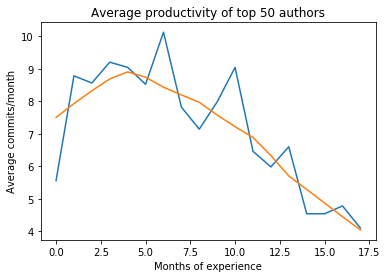

In [135]:
fig, ax = pt.subplots()
cy = pd.DataFrame(contributionMonthMatrix)
cy=cy.fillna(0)
cy = cy.T
cy = cy.head(18)
# cy.columns= ["author1", "author2", "author3"]
cy['mean']=cy.mean(axis=1)
cy['1st']=cy.quantile(0.25, axis=1)
cy['3rd']=cy.quantile(0.80,axis=1)
cy['median']=cy.median(axis=1)
print(cy)


ax.plot(range(18), cy['mean'])
# pt.show()
# pt.plot(maxSoFar, cy['1st'])
# pt.plot(maxSoFar, cy['3rd'])
# pt.plot(maxSoFar, cy['median'])

# ax.legend(['mean'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


lowess = sm.nonparametric.lowess
Z = lowess(cy['mean'],range(18),frac=0.5,it=2)

lowess_x = list(zip(*Z))[0]
lowess_y = list(zip(*Z))[1]
pt.plot(lowess_x, lowess_y)
# ax.legend(['smooth','legend'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pt.xlabel('Months of experience')
pt.ylabel('Average commits/month')
pt.title("Average productivity of top 50 authors")

pt.savefig('averageProductivity.png', bbox_inches="tight")




       0     1     2     3     4     5     6     7     8     9  ...    44  \
0   1.0   2.0   15.0  3.0   2.0   13.0  1.0   1.0   3.0   7.0   ...  6.0    
1   3.0   8.0   6.0   2.0   1.0   4.0   14.0  24.0  16.0  6.0   ...  10.0   
2   37.0  6.0   18.0  2.0   1.0   2.0   8.0   20.0  17.0  3.0   ...  1.0    
3   40.0  4.0   14.0  3.0   6.0   1.0   8.0   5.0   52.0  3.0   ...  9.0    
4   18.0  5.0   16.0  2.0   28.0  1.0   2.0   12.0  22.0  1.0   ...  2.0    
5   15.0  2.0   9.0   10.0  54.0  8.0   19.0  4.0   10.0  5.0   ...  1.0    
6   23.0  1.0   15.0  2.0   66.0  1.0   17.0  5.0   28.0  11.0  ...  1.0    
7   27.0  3.0   14.0  3.0   18.0  1.0   13.0  4.0   21.0  17.0  ...  1.0    
8   6.0   1.0   21.0  1.0   9.0   1.0   12.0  23.0  13.0  13.0  ...  6.0    
9   1.0   2.0   19.0  3.0   17.0  6.0   11.0  36.0  17.0  4.0   ...  1.0    
10  1.0   1.0   23.0  12.0  33.0  5.0   13.0  42.0  41.0  14.0  ...  2.0    
11  4.0   1.0   10.0  20.0  15.0  4.0   14.0  4.0   3.0   20.0  ...  4.0    

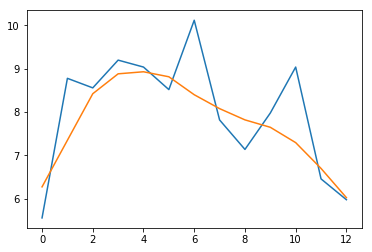

In [29]:
fig, ax = pt.subplots()
cy = pd.DataFrame(contributionMonthMatrix)
cy=cy.fillna(0)
cy = cy.T
cy = cy.head(13)
# cy.columns= ["author1", "author2", "author3"]
cy['mean']=cy.mean(axis=1)
cy['1st']=cy.quantile(0.25, axis=1)
cy['3rd']=cy.quantile(0.80,axis=1)
cy['median']=cy.median(axis=1)
print(cy)


ax.plot(range(13), cy['mean'])
# pt.show()
# pt.plot(maxSoFar, cy['1st'])
# pt.plot(maxSoFar, cy['3rd'])
# pt.plot(maxSoFar, cy['median'])

# ax.legend(['mean'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


lowess = sm.nonparametric.lowess
Z = lowess(cy['mean'],range(13),frac=0.5,it=2)

lowess_x = list(zip(*Z))[0]
lowess_y = list(zip(*Z))[1]
pt.plot(lowess_x, lowess_y)
# ax.legend(['smooth','legend'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# pt.xlabel('months',fontsize=15)
# pt.ylabel('number of commits',fontsize=15)
# pt.title("Average Commits of top 5")

pt.savefig('averageProductivity12.png', bbox_inches="tight")


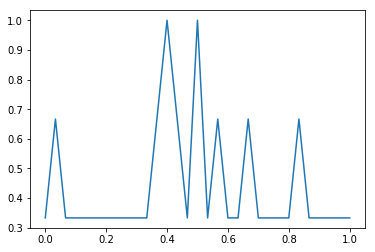

In [114]:
subMatrix = df[df.author=="yliu"]
subMatrixGroups= subMatrix.groupby(subMatrix.timeStamp.dt.month)['commit'].count()

contributionPerMonth=subMatrix.timeStamp.groupby(subMatrix.timeStamp.dt.to_period('D')).count()
# subMatrix.groupby(subMatrix.timeStamp.dt.month)
# subMatrix= subMatrix.set_index('timeStamp')
# subMatrix
contributionPerMonth.values
maxYValue = max(contributionPerMonth.values)
y_values = contributionPerMonth.values/maxYValue

rangeOfValues = np.array((range(len(contributionPerMonth.values))))
maxXValue = max(rangeOfValues)
x_values = rangeOfValues/maxXValue
pt.plot(x_values, y_values)

# subMatrixGroups
# subMatrix.set_index(timeStamp)
# subMatrix.plot(grid=True)
# pt.plot(subMatrix.index)
# subMatrix
# subMatrix.index=subMatrix.timeStamp
# subMatrix.dtypes

In [115]:
from sklearn import metrics

In [116]:
metrics.auc(x_values, y_values)

0.44444444444444453